In [2]:
#https://haydar-ai.medium.com/learning-data-science-day-21-decision-tree-on-iris-dataset-267f3219a7fa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('iris_big.csv')


In [3]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target_name          False
dtype: bool

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.955380,3.139507,3.840667,1.239953
std,0.853156,0.426284,1.793186,0.776807
min,4.140000,1.950000,1.020000,0.050000
25%,5.260000,2.850000,1.600000,0.310000
50%,5.910000,3.105000,4.395000,1.370000
75%,6.560000,3.392500,5.252500,1.890000
max,8.400000,4.570000,7.230000,2.770000


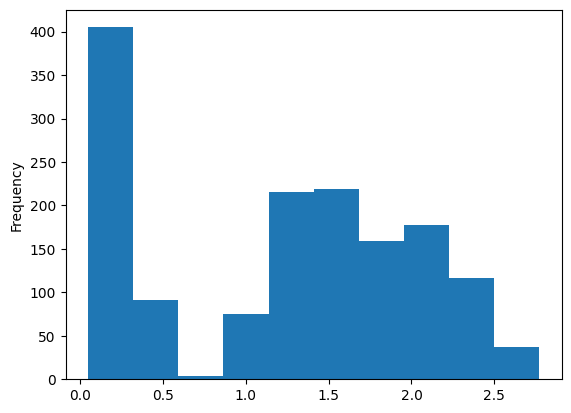

In [5]:
df['petal width (cm)'].plot.hist()
plt.show()

# That seems very weird, about 50 flowers in this dataset have values between 0.1 and 0.5.
# Let’s check the file.

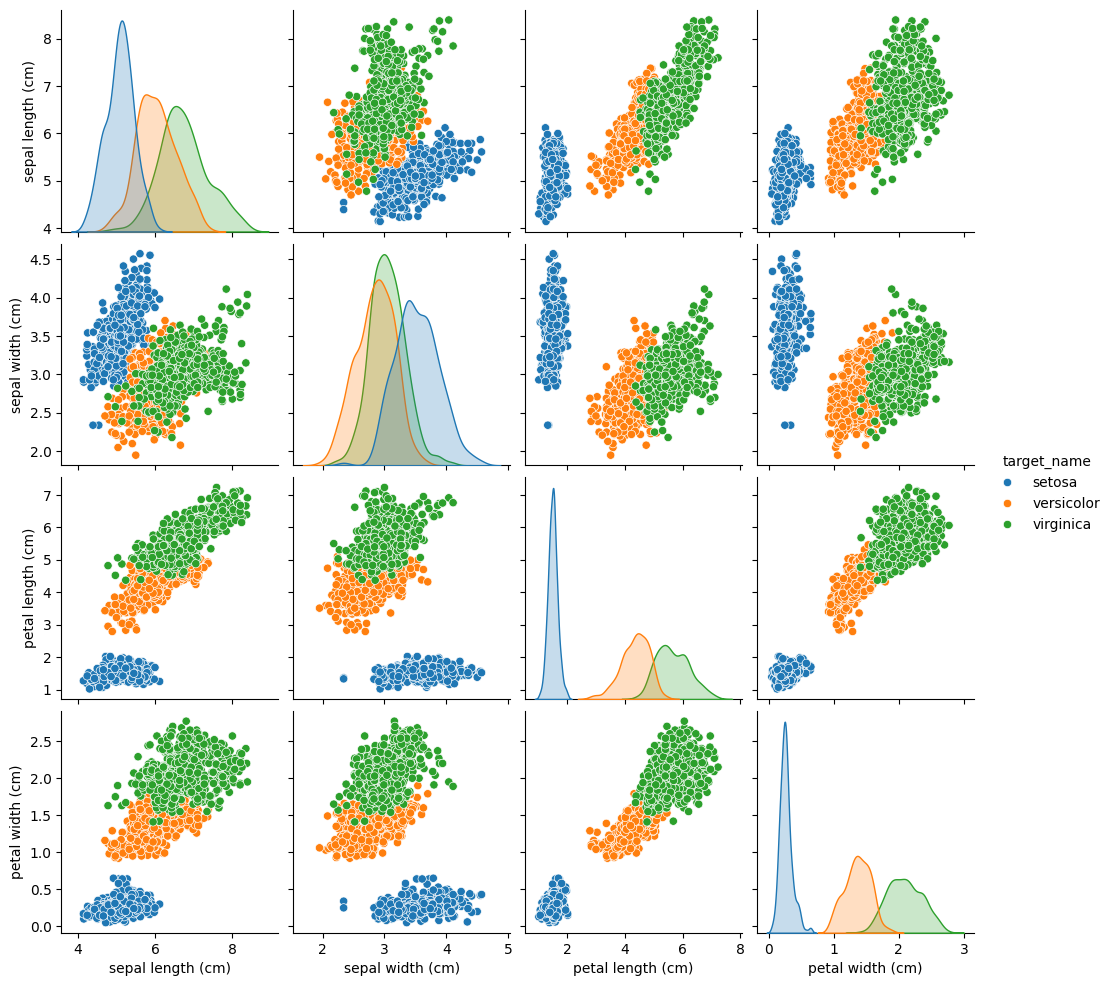

In [6]:
# If you see, most of them already separated based on those properties.
# However, there are some outliers. 
# Those outliers might be from wrong data or maybe it is really a data anomaly. 
# Let’s assume that it is just a data anomaly to avoid too much assumption.

sns.pairplot(df, hue='target_name')

In [7]:
all_inputs = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
all_classes = df['target_name'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=286123)

In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)

0.9711111111111111

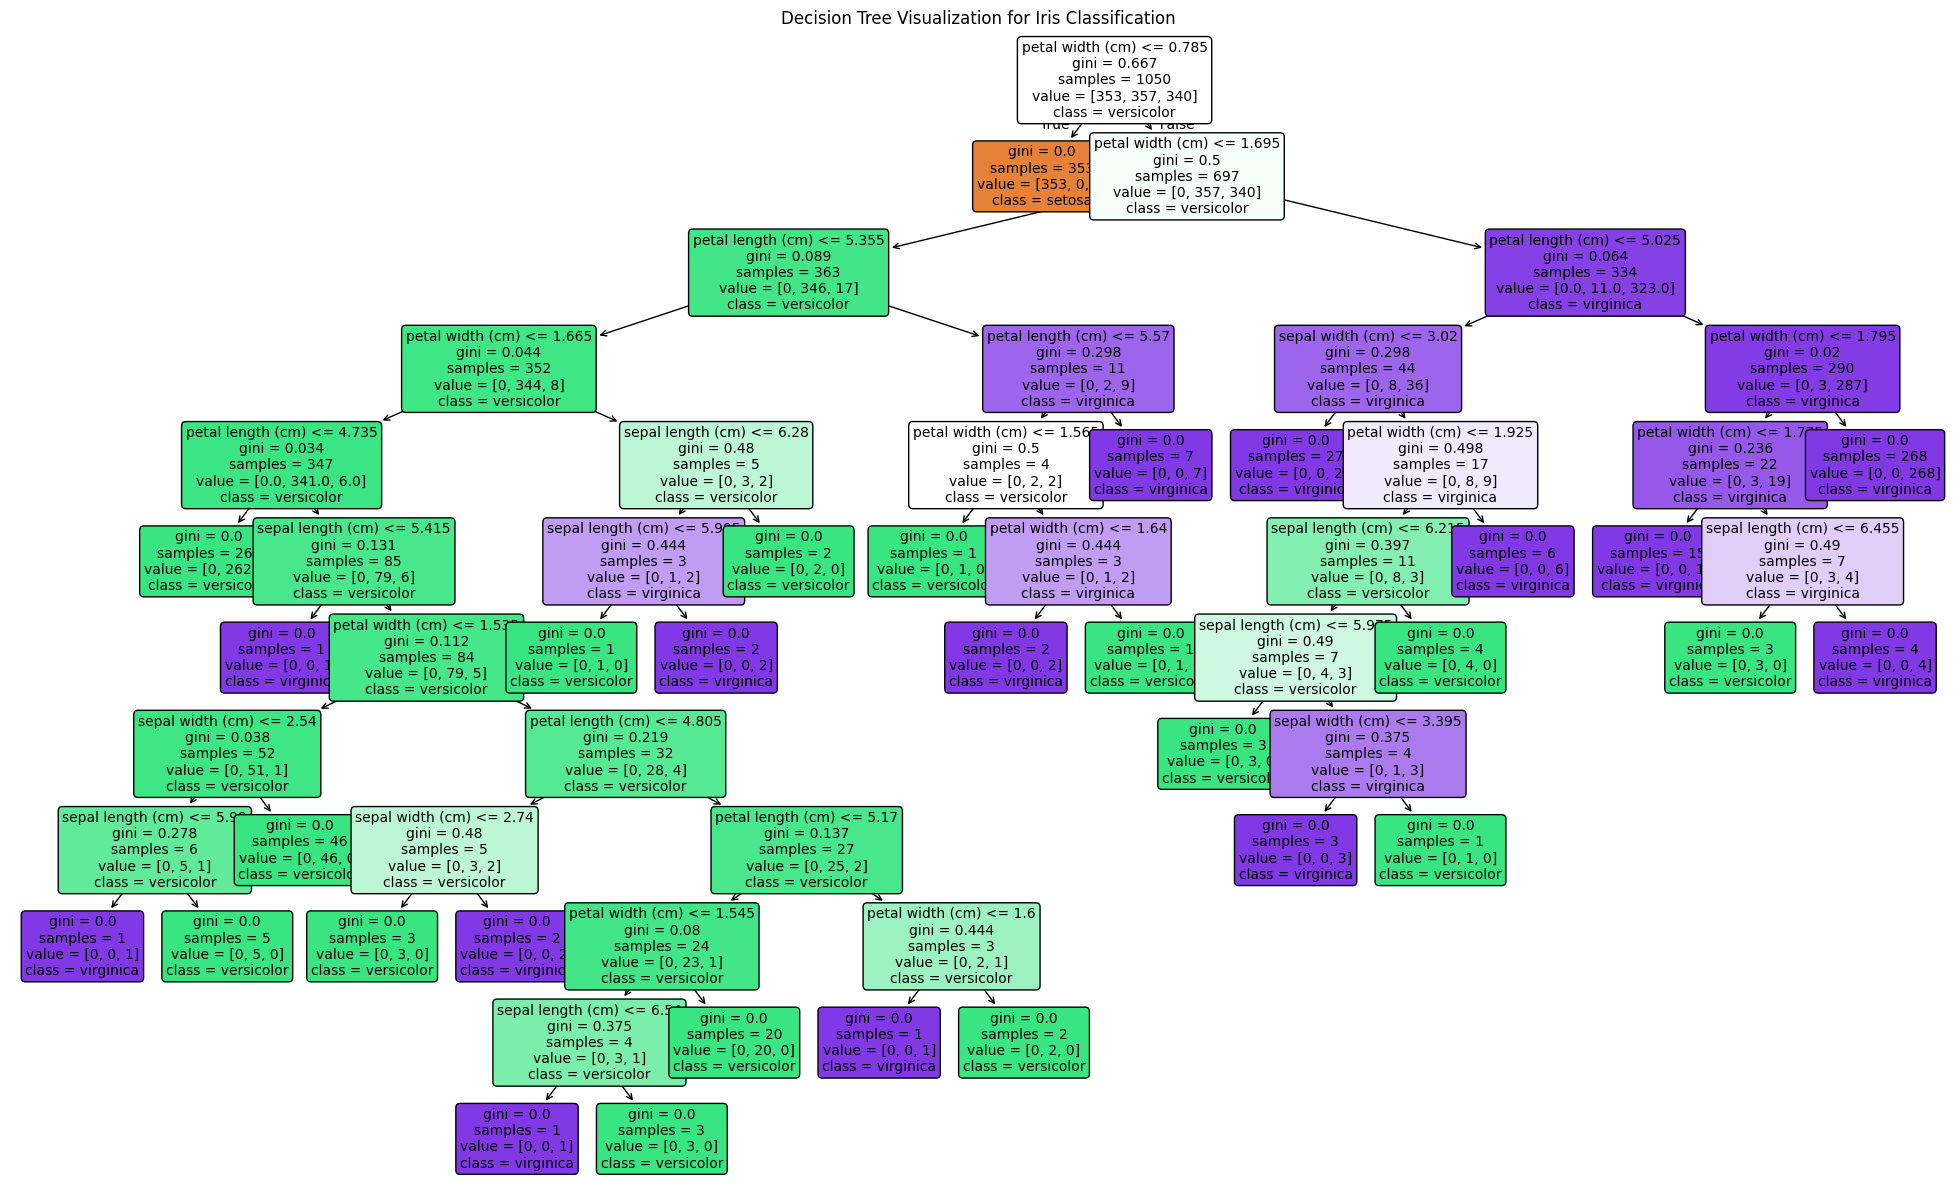

In [9]:
from sklearn.tree import plot_tree

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(25, 15))
plot_tree(
    dtc,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization for Iris Classification")
plt.show()

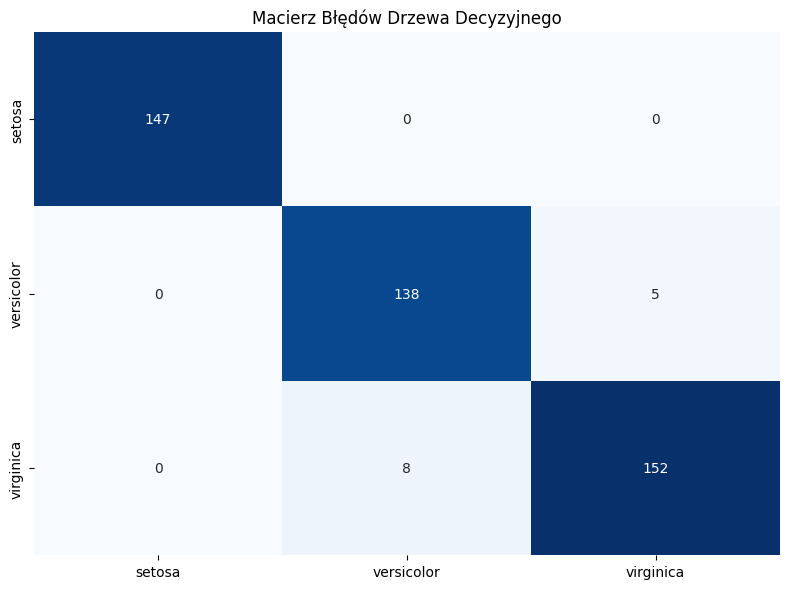

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

test_predictions = dtc.predict(test_inputs)

cm = confusion_matrix(test_classes, test_predictions)

class_names = dtc.classes_ 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True,        
            fmt='d',            
            cmap='Blues',            
            xticklabels=class_names,
            yticklabels=class_names, 
            cbar=False)      

plt.title('Macierz Błędów Drzewa Decyzyjnego')

plt.tight_layout()
plt.show()